In [28]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from sklearn.naive_bayes import GaussianNB
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt

In [29]:



img_height, img_width = 224, 224
batch_size = 32

train_dir = 'D:/FCI/CV/سكاشن/Dataset/train'
test_dir = 'D:/FCI/CV/سكاشن/Dataset/test'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True,
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True,
)

Found 3208 images belonging to 2 classes.
Found 708 images belonging to 2 classes.


In [30]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width,img_height,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


C:\Users\elnour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:


def extract_features(generator, max_steps=None):
    features = []
    labels = []
    steps = max_steps if max_steps else len(generator)
    for _ in range(steps):
        X, y = next(generator)
        batch_features = model.predict(X)
        features.append(batch_features)
        labels.append(y)
    return np.concatenate(features), np.concatenate(labels)


def extract_features_single_image(x,y):
    features = []
    labels = []
    batch_features = model.predict(x)
    features.append(batch_features)
    labels.append(y)
    return np.concatenate(features), np.concatenate(labels)



In [32]:

max_steps = None 

In [33]:
X_train, Y_train = extract_features(train_generator, max_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [34]:

X_test, Y_test = extract_features(test_generator,max_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [35]:

#optmizer take alot of time

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


# lgb_classifier = lgb.LGBMClassifier()

# param_grid = {
#     'n_estimators': [100,200,300,400,500],
#     'learning_rate': [0.1,0.3,0.5,1],
#     'max_depth': [1,2,3],
    
    
    
# }

 
# grid_search = HalvingGridSearchCV(estimator=DT_classifier, param_grid=param_grid, cv=5,n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, Y_train)


# print("Best parameters found: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_

In [36]:

NB_classifier =GaussianNB()
NB_classifier.fit(X_train, Y_train)


GaussianNB()

In [37]:

y_pred = NB_classifier.predict(X_test)

score =accuracy_score(Y_test, y_pred)
print("Accuracy:", score)

Accuracy: 0.5861581920903954


In [38]:

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.21      0.34       345
         1.0       0.56      0.94      0.70       363

    accuracy                           0.59       708
   macro avg       0.66      0.58      0.52       708
weighted avg       0.66      0.59      0.52       708



In [39]:
joblib.dump(NB_classifier, 'NB_classifier.pkl')

['NB_classifier.pkl']

In [40]:
NB_classifier_loaded = joblib.load('NB_classifier.pkl')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


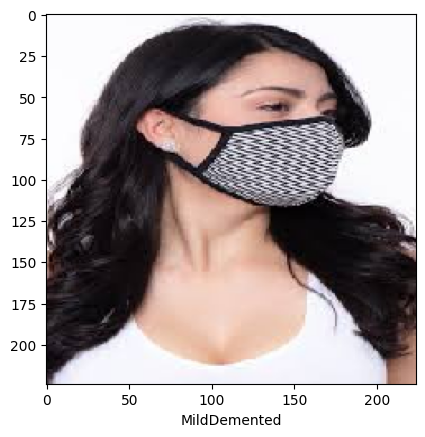

In [41]:

random_image, random_label = next(test_generator)


x ,y = extract_features_single_image(random_image,random_label)

prediction = NB_classifier_loaded.predict(x)

class_labels = {0: 'MildDemented', 1: 'ModerateDemented',2: 'NonDemented',3:'VeryMildDemented'}


result = class_labels[prediction[0]]

plt.imshow(random_image[0]) 
plt.xlabel(result)
plt.show()
